In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### LearningRateScheduler callback 객체에 입력된 scheduler 함수 선언
* epoch 증가 시 LR이 exponetially decay 되도록 설정.

In [2]:
# learning rate를 동적으로 만들어주는 샘플 함수

import tensorflow as tf
import numpy as np

def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)

2024-03-15 12:07:09.849966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 12:07:09.850086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 12:07:09.991530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### LearningRateScheduler로 Learning Rate를 epochs시마다 변경하기
* LearningRateScheduler 객체 생성 시 인자로 scheduler 함수 입력하여 생성
* model.fit() callbacks 인자로 LearningRateScheduler 객체 입력

In [3]:
np.arange(100).reshape(5, 20)

np.zeros((5,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import LearningRateScheduler


def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)


# 테스트용 임시 모델 생성
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')

# optimzer의 learning rate 찾기
print(model.optimizer.get_config())

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)

history = model.fit(np.arange(100).reshape(5, 20), np.zeros((5,1)),
                   epochs=15, callbacks=[lr_scheduler], verbose=1)

{'name': 'SGD', 'learning_rate': 0.009999999776482582, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'momentum': 0.0, 'nesterov': False}

Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 5132.3955 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.003678794329486961.
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 86430736.0000 - learning_rate: 0.0037

Epoch 3: LearningRateScheduler setting learning rate to 0.0013533527735202998.
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 192540229632.0000 - learning_rate: 0.0014

Epoch 4: LearningRateScheduler setting learning rate to 0.0004978706704056293.
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 53898228269056.0000 - learning

I0000 00:00:1710504441.624672      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 9: LearningRateScheduler setting learning rate to 3.3546261977665306e-06.
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15643727364096.0000 - learning_rate: 3.3546e-06

Epoch 10: LearningRateScheduler setting learning rate to 1.2340980071972147e-06.
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14298823786496.0000 - learning_rate: 1.2341e-06

Epoch 11: LearningRateScheduler setting learning rate to 4.53999290682683e-07.
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13840175595520.0000 - learning_rate: 4.5400e-07

Epoch 12: LearningRateScheduler setting learning rate to 1.6701700564713763e-07.
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13676017876992.0000 - learning_rate: 1.6702e-07

Epoch 13: LearningRateScheduler setting learning rate to 6.144212299791123e-08.
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13616231219200.0000 - learning_rate: 6.1442e-08

Epoch 14: LearningRateScheduler setting learning rate to 2.26032

### scheduler_exp 함수 결과를 시각화

In [5]:
def scheduler_exp(epoch):
    initial_lr = 0.01
    if epoch < 1:
        return initial_lr
    else:
        return initial_lr * np.exp(-1.0)**epoch
    
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)
history = model.fit(np.arange(100).reshape(5,20), np.zeros((5,1)),
                   epochs=15, callbacks=[lr_scheduler], verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - loss: 3855.6301 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.003678794411714424.
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 65091392.0000 - learning_rate: 0.0037

Epoch 3: LearningRateScheduler setting learning rate to 0.0013533528323661274.
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 145003003904.0000 - learning_rate: 0.0014

Epoch 4: LearningRateScheduler setting learning rate to 0.0004978706836786397.
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40591018688512.0000 - learning_rate: 4.9787e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00018315638888734192.
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1238140689842176.0000 - learning_rate: 1.8316e-04

Epoch 6: LearningRateScheduler setting learning rate to 6.737946999085473e-05.
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [6]:
epoch_list = range(30)
lr_list = [scheduler_exp(epoch) for epoch in epoch_list]

lr_list

[0.01,
 0.003678794411714424,
 0.0013533528323661274,
 0.0004978706836786397,
 0.00018315638888734192,
 6.737946999085473e-05,
 2.4787521766663612e-05,
 9.118819655545175e-06,
 3.3546262790251236e-06,
 1.2340980408667975e-06,
 4.539992976248494e-07,
 1.6701700790245693e-07,
 6.144212353328224e-08,
 2.2603294069810598e-08,
 8.3152871910357e-09,
 3.0590232050182664e-09,
 1.1253517471925945e-09,
 4.1399377187851794e-10,
 1.5229979744712678e-10,
 5.602796437537287e-11,
 2.0611536224385655e-11,
 7.582560427911936e-12,
 2.789468092868936e-12,
 1.0261879631701935e-12,
 3.7751345442791145e-13,
 1.3887943864964086e-13,
 5.10908902806335e-14,
 1.8795288165390926e-14,
 6.9144001069402386e-15,
 2.5436656473769363e-15]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6,4))
    plt.plot(epoch_list,lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

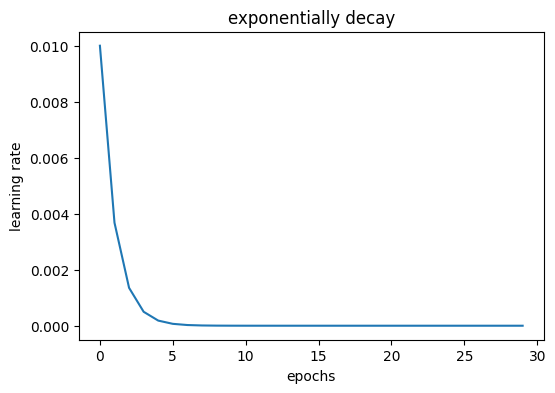

In [8]:
plot_scheduler(epoch_list, lr_list, title='exponentially decay')

### 또 다른 함수(step_decay)로 LearningRateScheduler 객체 생성하여 LR 조절

0 0.1
1 0.1
2 0.1
3 0.1
4 0.1
5 0.05
6 0.05
7 0.05
8 0.05
9 0.05
10 0.025
11 0.025
12 0.025
13 0.025
14 0.025
15 0.0125
16 0.0125
17 0.0125
18 0.0125
19 0.0125
20 0.00625
21 0.00625
22 0.00625
23 0.00625
24 0.00625
25 0.003125
26 0.003125
27 0.003125
28 0.003125
29 0.003125


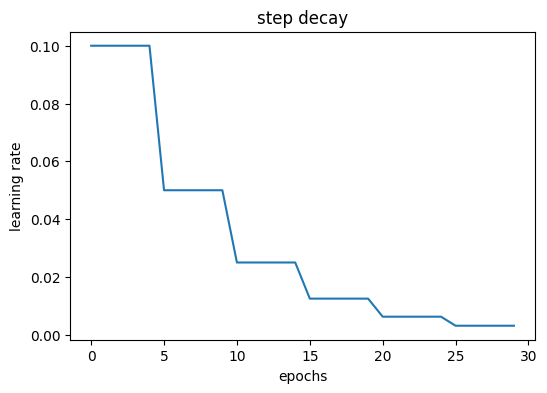

In [9]:
import tensorflow as tf

def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * (drop ** np.floor((epoch)/epochs_drop))
    print(epoch, lr)
    return lr

lr_list = [step_decay(epoch) for epoch in epoch_list]
plot_scheduler(epoch_list, lr_list, title='step decay')

In [10]:
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('초기 learning_rate: ', model.optimizer.get_config().get('learning_rate'))

lr_scheduler = LearningRateScheduler(step_decay, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros((5, 1)),
                   epochs=15, callbacks=[lr_scheduler], verbose=1)

초기 learning_rate:  0.009999999776482582
0 0.1

Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 4423.4307 - learning_rate: 0.1000
1 0.1

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7559795712.0000 - learning_rate: 0.1000
2 0.1

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12956862991302656.0000 - learning_rate: 0.1000
3 0.1

Epoch 4: LearningRateScheduler setting learning rate to 0.1.
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22206995309184969342976.0000 - learning_rate: 0.1000
4 0.1

Epoch 5: LearningRateScheduler setting learning rate to 0.1.
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 38060958672863861226197745664.0000 - learning_rate: 0.1000
5 0.05

Epoch 6: LearningRateScheduler setting learning rate to 0.05.
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━